-------------------------------------------------------------------------------------------------------------------
Cal State LA - CS4662\
5.2.2021

Members: Roles\
Tim Ellis: Data Analysis, Documentation, Preprocessing, ML/DL Models, and Data Visualization\
Brian Hernandez: Data Analysis and Documentation\
David Melendez: Data Analysis and Documentation

-------------------------------------------------------------------------------------------------------------------
## Table of Contents
-------------------------------------------------------------------------------------------------------------------

+ 1. **Introduction** 
+ 2. **Create Dataframes**
+ 3. **Data Evaluation and Preprocessing**
    - A. Samples and Labels
    - C. Evaluting Raw Samples
    - D. Audio as Images
    - E. Mel Spectogram
+ 4. **Featurization** 
    - A. Transform Image into Numeric Data
    - B. Generate Feature Matrix
    - C. Create Label Vector
+ 5. **Classification Models** 
    - A. Dimensional Reduction
    - B. Parameter Tuning and Probabilities
    - C. Ensemble Learning & Stacking
    - D. Evaluate Results
+ 6. **Deep Learning Models**
    - A. Feature and Label Processing for ANN
    - B. Define ANN
    - C. ANN Training
    - D. ANN Testing and Score
    - E. Feature and Label Processing for CNN
    - F. Define CNN
    - G. CNN Training
    - H. CNN Testing and Score
+ 7. **Conclusion and Future Work**
+ 8. **Resources**

-------------------------------------------------------------------------------------------------------------------
## 1.) Introduction
-------------------------------------------------------------------------------------------------------------------

Research Code Competition Title: Freesound Audio Tagging 2019

In this project, we are exploring the 2019 Freesound Audio Tagging challenge. The dataset and code competition was proposed through a collaboration between Freesound (https://freesound.org) and Google Research’s Machine Perception Team (https://research.google/teams/perception/).

The inspiration behind this research code competition is that, to this day, there is no reliable audio recognition system for general audio sounds. While there have been great improvements to many voice-recognition systems, when it comes to general sounds such as a chainsaw or a blender or a kid skateboarding down a block, these sounds usually have to be identified and labeled by humans. Thus, the reason for this Audio-Tagging project. 

This project is intended to accurately categorize a sound based on a piece of audio sounds. Tagging audio with an appropriate label can be helpful for many real life applications including adding general-sound captions on films, installing accessibility features for the hearing impaired, censoring offensive language sounds, and improving human computer interactions through natural language processing.

#### About the Data:

- The curated data subset provided includes 4,970 audio clips with a total of 213 unique audio labels
- The audio duration length ranges from 0.3 to 30 seconds. 
- Each individual data sound sample was manually-labeled by FSD (https://annotator.freesound.org/fsd/).
- The data set includes a csv file with the File Name and Labels of each audio file

-------------------------------------------------------------------------------------------------------------------
## 2.) Create Dataframes
-------------------------------------------------------------------------------------------------------------------

- We begin by importing the necessary libraries

In [114]:
# grouped imports
import numpy as np
from numpy import mean
from numpy import std

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm

import IPython.display as ipd 
from IPython.display import Audio

import wave

import scipy
from scipy.io import wavfile

import librosa
import librosa.display

from sklearn import preprocessing
from skimage.transform import resize
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping
from keras.layers import Convolution2D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from tensorflow.keras import layers

from xgboost import XGBClassifier

import os

import pylab

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

- We create a pandas dataframe using our training (train_curated.csv) and testing (sample_submission.csv) files

In [95]:
# import training data into pandas dataframe and print first 10 rows
train = pd.read_csv("./data/train_curated.csv")
train[0:10]

,fname,labels
0,0006ae4e.wav,Bark
1,0019ef41.wav,Raindrop
2,001ec0ad.wav,Finger_snapping
3,0026c7cb.wav,Run
4,0026f116.wav,Finger_snapping
5,003be5db.wav,Whispering
6,0041de6b.wav,"Acoustic_guitar,Strum"
7,004ca909.wav,Hi-hat
8,00713ec2.wav,Bass_drum
9,0073825a.wav,"Crowd,Cheering"


In [96]:
# import testing data into pandas dataframe and print first 10 rows
test = pd.read_csv("./data/sample_submission.csv")
test[0:10]

,fname,Accelerating_and_revving_and_vroom,Accordion,Acoustic_guitar,Applause,Bark,Bass_drum,Bass_guitar,Bathtub_(filling_or_washing),Bicycle_bell,...,Toilet_flush,Traffic_noise_and_roadway_noise,Trickle_and_dribble,Walk_and_footsteps,Water_tap_and_faucet,Waves_and_surf,Whispering,Writing,Yell,Zipper_(clothing)
0,4260ebea.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,426eb1e0.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,428d70bb.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4292b1c9.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,429c5071.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,42c4e76e.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,42cbf9d5.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,42f88540.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,42ff5f3e.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,43023d54.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# print the amount of samples and labels/classes in training and testing set
print("There are", train.shape[0],"Training samples and",len(set(train.labels)), "labels")
print("There are", test.shape[0], "Testing samples and", len(set(test.columns[1:])), "labels")

There are 4970 Training samples and 213 labels
There are 3361 Testing samples and 80 labels


-------------------------------------------------------------------------------------------------------------------
## 3.) Data Evaluation and Preprocessing
-------------------------------------------------------------------------------------------------------------------

#### A. Samples and Labels

In our data set, there are audio files that contain multiple labels. So, in order to simplify our data, we are removing files that contain more than one labels. 

We end up with 4269 training samples instead of 4970, and 74 labels instead of 213.

In [98]:
# only use training samples with a single label
train = train[train.labels.isin(test.columns[1:])]

# print our training set now that we only have samples with 1 label
print("There are now", train.shape[0], "Training samples and",len(set(train.labels)), "labels")

There are now 4269 Training samples and 74 labels


Now, in order to have a better understanding of our data, we create a list that contains the label names along with the number of times they appear in the data set. 

In [99]:
# get the count of samples for each label
labelGroups = train.groupby(['labels']).count()

# create a counts column
labelGroups.columns = ['counts']

# print the labels and counts
print(labelGroups)

                                    counts
labels                                    
Accelerating_and_revving_and_vroom      32
Accordion                               47
Acoustic_guitar                          3
Bark                                    69
Bass_drum                               68
...                                    ...
Waves_and_surf                          71
Whispering                              68
Writing                                 72
Yell                                    24
Zipper_(clothing)                       75

[74 rows x 1 columns]


In [100]:
# iMax is the index of each label that has the most amount of samples
iMax = np.where(train.labels.value_counts()== max(train.labels.value_counts()))

# maxList is a list of all label names that have the most amount of samples 
maxList = train.labels.value_counts().keys()[iMax].values

# iMin is the index of each label that has the least amount of samples
iMin = np.where(train.labels.value_counts()== min(train.labels.value_counts()))

# minList is a list of all label names that have the least amount of samples 
minList = train.labels.value_counts().keys()[iMin].values

# iterate through each label in the maxList and print the label name and amount of samples
print("The Labels with the most ammount of samples are:")
for i in maxList:
    print(i, "with", max(train.labels.value_counts()), "samples")
    
print()
print()

# iterate through each label in the minList and print the label name and amount of samples
print("The Labels with the least ammount of samples are:")
for i in minList:
    print(i, "with", min(train.labels.value_counts()), "samples")

The Labels with the most ammount of samples are:
Keys_jangling with 75 samples
Finger_snapping with 75 samples
Marimba_and_xylophone with 75 samples
Computer_keyboard with 75 samples
Gong with 75 samples
Zipper_(clothing) with 75 samples
Skateboard with 75 samples
Scissors with 75 samples
Printer with 75 samples


The Labels with the least ammount of samples are:
Acoustic_guitar with 3 samples


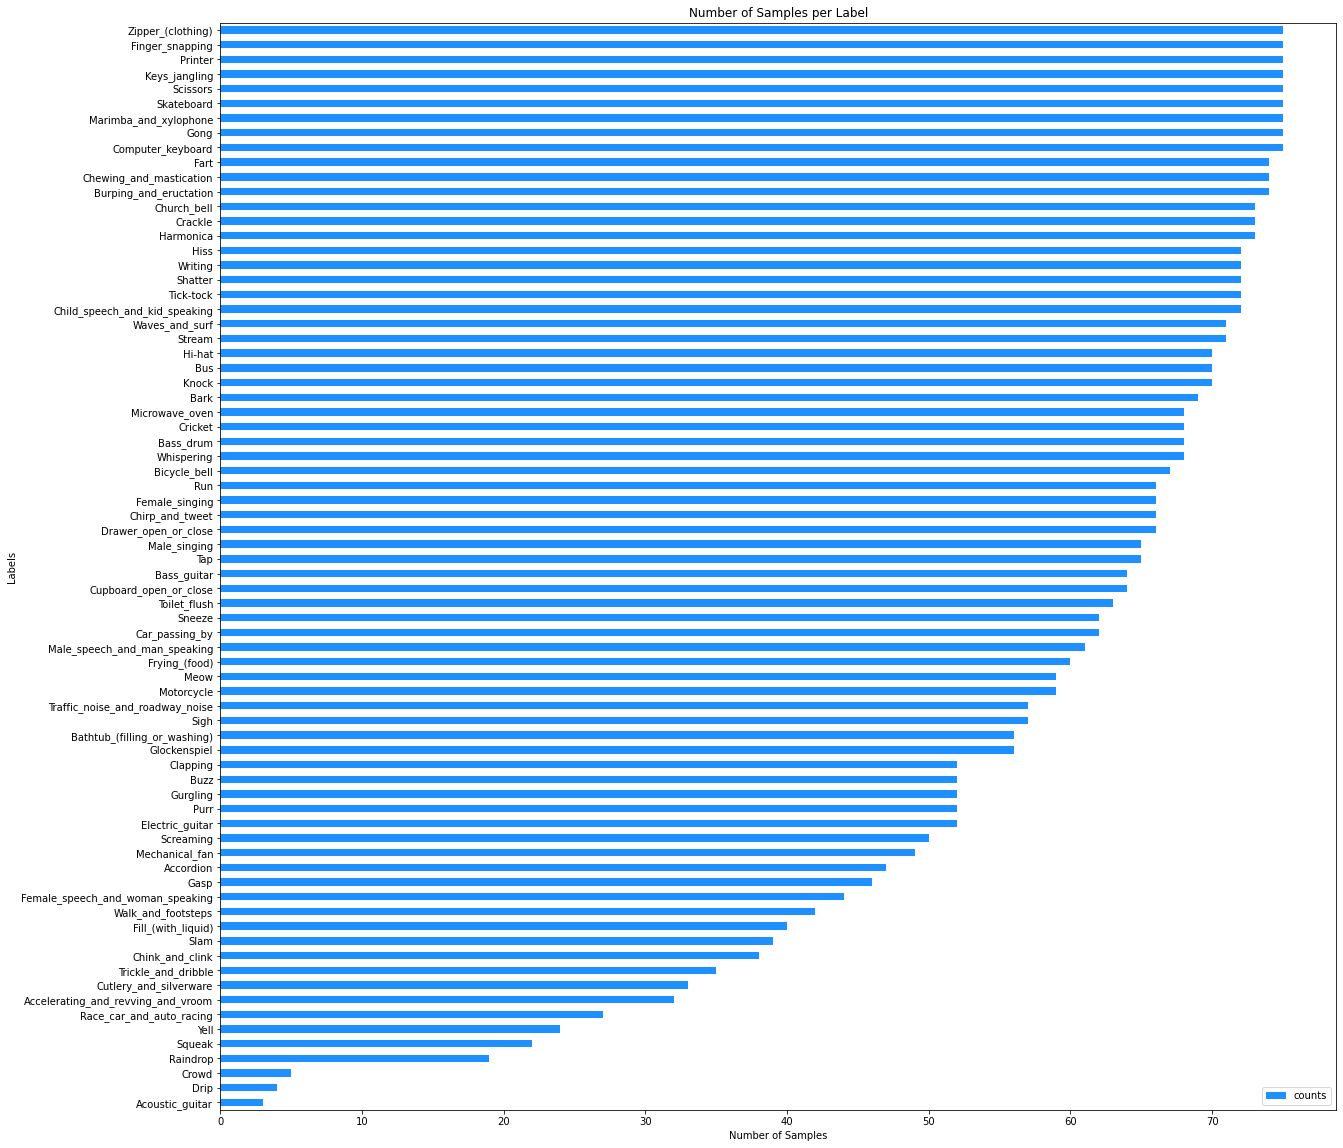

In [101]:
# keep figure inline
%matplotlib inline

# print a horizontal bar chart showing amount of samples per label
# refrence https://github.com/divyanshjain11/Freesound_Audio_Tagging
plot = labelGroups.sort_values(ascending=True, by='counts').plot(
    kind='barh', 
    title="Number of Samples per Label", 
    color='dodgerblue', 
    figsize=(20,20))
plot.set_xlabel("Number of Samples")
plot.set_ylabel("Labels");

#### C. Evaluting Raw Samples

Now that we have organized our samples on a macro scale, let's zoom in and take a look at each individual sample.

We will now import one sample and perform the following steps:
1. Read in the data and sample/frame rate from the individual sample
2. Import sample using Wav library as well
3. Get the frame/sample rate
4. Get the amount of frames
5. Get the sample duration  (frames / frame rate)
6. Use iPython to display the sample for listening

In [12]:
# get a sample file name from our training folder
motorcycle = './data/train_curated/00c4e82c.wav'

# read the wav file using scipy.io for plotting
rate, data = wavfile.read(motorcycle)

# read using wave for framerates and samples
wav = wave.open(motorcycle)

# get and print frame rate/sample rate, frames/samples, and then calculate duration
frame_rate = wav.getframerate()
frames = wav.getnframes()
duration = wav.getnframes()/wav.getframerate()

print("MOTORCYCLE")
print("sample rate:", frame_rate)
print("total samples", frames)
print("duration:", duration)

# use iPython to listen to sample
ipd.Audio(motorcycle)

MOTORCYCLE
sample rate: 44100
total samples 534696
duration: 12.124625850340136


#### D. Audio as Images

#### Time Series:
For our Machine Learning and Deep Learning models we will need to convert our audio to visual images. The first and most common step for this is to plot the audio as a time series image, where the amplitude is a function of time or samples. For our plot below, we will use sample duration as our time dimension and of course amplitude will be our y-axis. Audio produces vibrating sinusoidal patterns in the air, and for each peice of the pattern, amplitude measures the height/depth of the each wave, so it is like measuring intensity of the vibration.

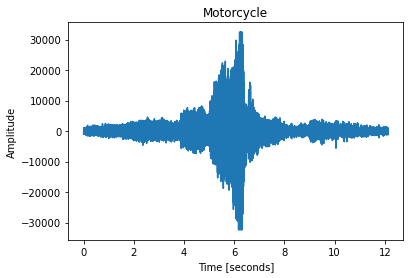

In [13]:
# make a time vector for x axis (instead of samples)
time = np.arange(0,duration,1/frame_rate) 

# show the wav form in a time series plot
plt.plot(time, data);

# label the axes, title, and show plot
plt.ylabel("Amplitude")
plt.xlabel("Time [seconds]")
plt.title('Motorcycle')
plt.show()

We can also zoom in and see on a smaller scale how the amplitude is changing over time

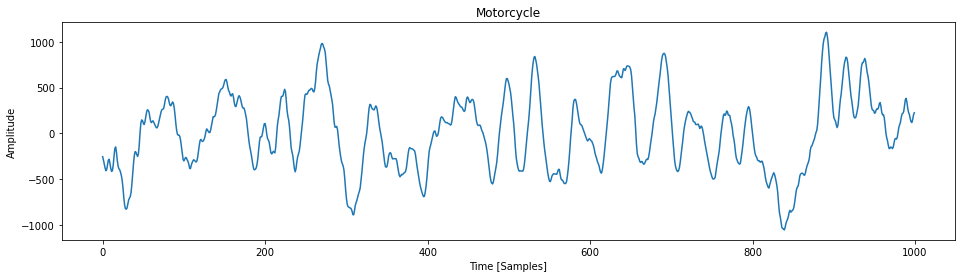

In [14]:
# zoom in on wav's first 1000 samples
plt.figure(figsize=(16, 4))
plt.plot(data[:1000]);

# label the axes, title, and show plot
plt.ylabel("Amplitude")
plt.xlabel("Time [Samples]")
plt.title('Motorcycle')
plt.show()

Problems with time series:
- The issue with amplitude is that it is linear in scale, and does not 
accurately reflect the way humans hear audio, which is much more logarithmic. 
- The other problem with a time series image is that it does not contain very much data from the audio sample, for instance tone or pitch, for that we can move onto the fourier transform.
- Two audio samples could have very similiar time series plots while sounding dramatically different, so this is whay Machine and Deep Learning models would have a difficult time with this type of image

#### Fourier Transform:

So in order to display more data about the audio we can use a fourier transform which is a mathematical forumla that ouputs a audio samples' frequency and amplitude. In our example we will replace our time dimension with frequency and this should give us a bit more unique data for training.

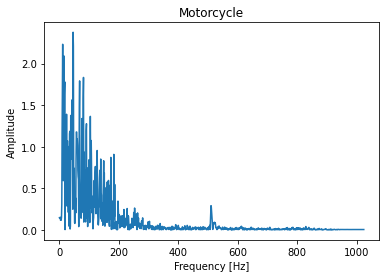

In [16]:
# use librosa to load a sample using kaiser_fast for faster load
data, sr = librosa.core.load('./data/train_curated/00c4e82c.wav', res_type='kaiser_fast')

# window length to plot
n_fft = 2048

# plot short-time fourier transform for n_fft window
# good explanation - "An audio signal is comprised of several 
# single-frequency sound waves...[the Fourier transform] converts
# the signal from the time domain into the frequency domain"
# https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53
ft = np.abs(librosa.stft(data[:n_fft], hop_length = n_fft+1))
plt.plot(ft)

plt.title('Motorcycle')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude');

Problems with fourier transform:
- The frquency generated by a fourier transform is linear and not on a scale that accurately reflects how human being hear frequency which is much more logarithmic
- Similiar to frequency, Amplitude is also not an accurate representation of how humans hear audio and doesn't produce the best data for training
- The 2D plot does not give us enough image data for training either so a better bet is to make a 3d graph or a spectrogram

#### E. Mel Spectogram

In our research, we found the Mel Spectrogram to be one of the most popular visual representations of audio for machine and deep learning models. The Mel spectrogram converts frequencies to the Mel scale, which is more logarithmic, and more accurately represents the way human being hear pitch and tone. The spectrogram adds another level of data to our plot, making it 3d instead of 2d. In our case we add the dimension decibels, which converts amplitude to a more logarithmic scale, a scale more reflective of how humans hear changes in volume and intensity. Finally we add back in the time dimension which will give us a full image with lots of data for training.

Process:
- Get our audio and resample to 16000 sample rate (for faster processing)
- Trim audio that is less than 60db, so the quiet and silent parts will be ommited
- Make Mel Spectrogram using Librosa library
- Resize the image to 128 x 128 to preserve uniformity for our numpy arrays
- Convert amplitude to decibel range

(128, 379)
(128, 128)


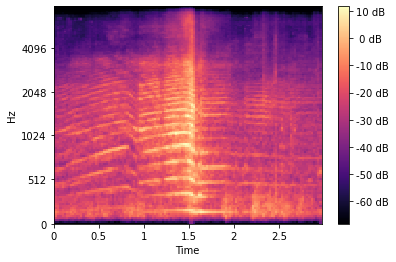

In [18]:
# use librosa to load a sample at sample rate of 16000 Hz and kaiser_fast for faster load
data, _ = librosa.core.load('./data/train_curated/00c4e82c.wav', sr=16000, res_type='kaiser_fast')

# trim sections below 60db so we can cut silence
data, _ = librosa.effects.trim(data, top_db=60)

# create mel spectrogram numpy array and show the shape
# good explanation - "humans do not perceive frequencies
# on a linear scal...[The mel is ] a unit of pitch such that
# equal distances in pitch sounded equally distant to the listener...
# a Mel spectogram is a spectogram where the frequencies are 
# converted to the mel scale
# https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53"
sg = librosa.feature.melspectrogram(data, n_fft=2048, hop_length=512, power=1.0, n_mels=128, fmin=0.0, fmax=None)
print(sg.shape)

# resize our image/numpy array to be 128 x 128, so that each image is consistent size
sg_resized = resize(sg, (128, 128))

#print new shape to show resized
print(sg_resized.shape)

# convert to decibel range
# good explanation: "the human perception of sound levels is not linear, 
# but better approximated by a logarithm...By converting to decibels(dB), 
# the scale becomes logarithmic...The intensity of colors when this is 
# plotted corresponds more closely to what we hear than if one used a linear scale." 
# https://stackoverflow.com/questions/63347977/what-is-the-conceptual-purpose-of-librosa-amplitude-to-db
db_spec = librosa.amplitude_to_db(sg_resized, ref=1.0, amin=1e-05, top_db=80.0)

# plot mel spectogram
librosa.display.specshow(db_spec, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%2.0f dB');

Below, we do the above procedure for each audio sample and save into a folder

In [85]:
# if directory 'mel_specs' doesn't exist then create one
# if not os.path.exists('./data/mel_specs'):
#     os.makedirs('./data/mel_specs')

# constant image size we will use
# IMAGE_SIZE = (128, 128)

# iterate through every sample in our train set, plot mel spec, resize to
# 128 x 128, remove plot info, convert amp to dB, save as image,
# remove '.wav' in the name, convert to '.png', and save to folder
# for fname in train['fname']:
#     data, _ = librosa.core.load(f'./data/train_curated/{fname}', sr=16000, res_type='kaiser_fast')
#     data, _ = librosa.effects.trim(data, top_db=60)
#     sg = librosa.feature.melspectrogram(data, n_fft=2048, hop_length=512, power=1.0, n_mels=128, fmin=0.0, fmax=None)
#     sg_resized = resize(sg, IMAGE_SIZE)
#     plt.figure(figsize=(1.28, 1.28))
#     pylab.axis('off')
#     pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
#     db_spec = librosa.amplitude_to_db(sg_resized, ref=1.0, amin=1e-05, top_db=80.0)
#     librosa.display.specshow(db_spec, y_axis='mel', fmax=8000, x_axis='time')
#     fname = fname.split('.wav')
#     fname = fname[0]
#     pylab.savefig('./data/mel_specs/' + fname + '.png', bbox_inches=None, pad_inches=0, dpi=100)
#     pylab.close()

-------------------------------------------------------------------------------------------------------------------
## 4.) Featurization
-------------------------------------------------------------------------------------------------------------------

#### A. Transform Image into Numeric Data

For our first step in featurization we do the following:
- Iterate through each sample
- Download sample at a sample rate of 16000
- Omit data less than 60db
- Create Mel Spectrogram
- Resize image to 128 x 128
- create numpy array from image data
- append numpy array to ou feature array

In [86]:
# list that will store the image information
# initialize with zeroed arrays to save on memory allocation time
# features = [np.zeros(IMAGE_SIZE)]*len(train)

# iterate through every sample in our train set, create mel spec, 
# cut out data less than 60 dB, resize to 128 x 128, convert amp to dB, 
# save to numpy array
# for i, fname in enumerate(train['fname']):
#     data, _ = librosa.core.load(f'./data/train_curated/{fname}', sr=16000, res_type='kaiser_fast')
#     data, _ = librosa.effects.trim(data, top_db=60)
#     sg = librosa.feature.melspectrogram(data, n_fft=2048, hop_length=512, power=1.0, n_mels=128, fmin=0.0, fmax=None)
#     sg_resized = resize(sg, IMAGE_SIZE)
#     imgArr = np.asarray(sg_resized)
#     features[i] = imgArr

#### B. Generate Feature Matrix

To create our feature matrix we simply stack each numpy array onto our numpy feature matrix we call X

In [87]:
# stack feature array to make feature matrix
# X = np.stack(features)

#### C. Create Label Vector

For our label vector we generate an index for each unique sample and append to a numpy vector we call y. Finally we save our feature matrix and label vector so we can easily load again for each future model

In [88]:
# generate y vector for labels, and save X and y to npz files.
# str_to_label = {label: idx for idx, label in enumerate(test.columns[1:])}
# y = np.array([str_to_label[name] for name in train['labels']])
# np.savez('./data/train_xy.npz', X=X, y=y)

-------------------------------------------------------------------------------------------------------------------
## 5.) Classification Models
-------------------------------------------------------------------------------------------------------------------

Before using our deep learning models, we wanted to try our dataset with some machine learning classification models. After trial and error, however, training was taking an enormously long time due to the amount of features, which was more than 16,000. We opted to try dimensional reduction before running through our classification models instead, so our first step here is to use PCA to reduce the feature space.

#### A. Dimensional Reduction

First let's load our feature matrix and label vector

In [19]:
# load pre-generated data directly from npz file.
train_data = np.load('./data/train_xy.npz')
X = train_data['X']
y = train_data['y']

Now we want to flatten our data from 3d to 2d, so the 128 x 128 images creates a feature space of 16,384 

In [20]:
# create a flattned version of X
print(X.shape)
X_flat = X.reshape(X.shape[0], -1)
print(X_flat.shape)

(4269, 128, 128)
(4269, 16384)


Now that we have our flattened feature matrix - X_flat, we want to run PCA on the data. Before we run PCA, however, let's find the optimal number of components. For our purpose we'll use the threshold of 95% cummulative variance as our target and find the number of components that will explain that threshold amount of the variance.

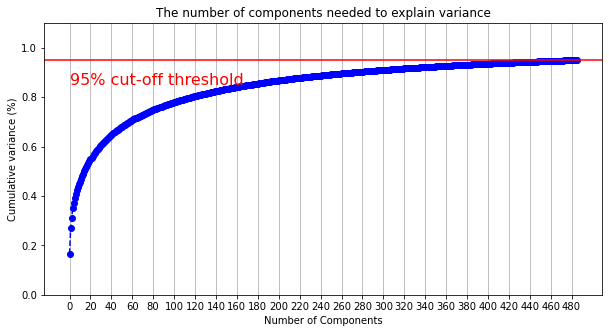

In [21]:
# the amount of features is far too large and takes too long to run models
# to run PCA and reduce our feature set we need to find the right amount of
# components. Because the principal compenents explain a part of the variance
# we plot to see the number of componenets needed to explain, in our case, 95% 
# of the variance
# reference https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
pca = PCA(n_components = 0.95)
pca.fit(X_flat)

plt.rcParams["figure.figsize"] = (10,5)

fig, ax = plt.subplots()
xi = np.arange(0, 486, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 486, step=20)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show();

According to our plot, the number of components required to explain 95% of the cumulative variance is 480, so that will be our principal components for our PCA algorithm. 
The Process:
- Download our feature matrix and label vectors
- Flatten our feature matrix
- Perform a test, train, split if we need it for our models
- Print the shape before our PCA
- Run PCA with our number of components at 480
- Print the shape after PCA

In [22]:
# reload and flatten
train_data = np.load('./data/train_xy.npz')
X = train_data['X']
y = train_data['y']
X_flat = X.reshape(X.shape[0], -1)

# first we split into train and test set in case we need them separated
# split the dataset into testing and training, with the test size set to 0.25
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.25, random_state=5)

# print our shapes before PCA
print(X_train.shape)
print(X_test.shape)
print(X.shape)

# 480 is the number of features after dimensionality reduction according to our plot
pca = PCA(n_components = 480)

# run PCA
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_pca = pca.fit_transform(X_flat)

# print our new shapes
print(X_train_pca.shape)
print(X_test_pca.shape)
print(X_pca.shape)

(3201, 16384)
(1068, 16384)
(4269, 128, 128)
(3201, 480)
(1068, 480)
(4269, 480)


We will seed for reproducibility before runnning all of our classification models

In [ ]:
# seed random state 
seed = 2
np.random.seed(seed)

#### B. Parameter Tuning and Probabilities

Now before training our models let's find the best parameters for each model and then get the probabilites for each each prediction so that we can plot the AUC (Area Under Curve) and ROC (Receiver Operating Characteristic) later on. First we create a dictionary to hold all of our accuracy scores

In [23]:
# create a dictionary to hold accuracy scores for each model
scores = dict()

#### Logistic Regression:
For our logistic regression model, we will use gridsearch to find our best performing number of iterations. We will use 3-fold cross validation to define our accuracy and then will print the results of gridsearch

In [24]:
# list of iterations to test
iters = [100, 250, 500, 1000]

# we create our grid, instantiate our model and run gridsearch to find best
# number of iterations
param_grid = dict(max_iter = iters)
lr = LogisticRegression(solver='lbfgs', random_state=1)
grid = GridSearchCV(lr, param_grid, cv = 3, scoring = 'accuracy')
grid.fit(X_pca,y)

print (grid.best_score_)
print (grid.best_params_)

0.27687983134223476
{'max_iter': 1000}


We can already see 2 things:


1.   PCA reduced our accuracy a decent amount (before we were getting closer to 35% accuracy for logistic regression)
2.   Classification models may not be the best solution for Audio Tagging and Image Recognition

So now lets train our model with our best iteration number and get probabilities that we can use for AUC later on

In [25]:
# now we run logisticRegression again with our best max_iter value 
# and get probabilities for fpr and tpr
my_lr = LogisticRegression(solver='lbfgs', max_iter = 1000, random_state=1)
score_list = cross_val_score(my_lr, X_pca, y, scoring='accuracy', cv=3, n_jobs=1, error_score='raise')
probs_lr = cross_val_predict(my_lr, X_pca, y, cv=3, method='predict_proba')
scores['lr'] = score_list.mean()

#### KNN
For our KNN gridsearch, we will create a list of k's and find the optimal amount. We again use 3-fold cross validation and print our results

In [26]:
# list of k's to test
ks = list(range(1,6))

# we create our grid, instantiate our model and run gridsearch to find best 
# k number
param_grid = dict(n_neighbors = ks)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv = 3, scoring = 'accuracy')
grid.fit(X_pca,y)

print (grid.best_score_)
print (grid.best_params_)

0.2764113375497775
{'n_neighbors': 1}


Our opinion holds that both PCA and the type of model are generating pretty low accuracies, and in this case, our gridsearch produces the value 1 as our amount of k's, because the model was not improving with the amount of ks increasing. This also shows the difficulty in audio tagging as most results online had fairly low accuracies as well. So again, let's get our probabilites

In [27]:
# now we run again with out optimal k and get our probabilities for 
# fpr and tpr
my_knn = KNeighborsClassifier(n_neighbors = 1)
score_list = cross_val_score(my_knn, X_pca, y, scoring='accuracy', cv=3, n_jobs=1, error_score='raise')
probs_knn = cross_val_predict(my_knn, X_pca, y, cv=3, method='predict_proba')
scores['knn'] = score_list.mean()

#### Decision Tree
For decision tree we will use a list of 4 values, 50 - 150) to find our best amount of tree depths. We again run gridsearch with 3-fold cross validation and print our results

In [28]:
# list of tree depths to test
depths = [50, 75, 100, 150]

# we create our grid, instantiate our model and run gridsearch to
# find best depth
param_grid = dict(max_depth = depths)
dt = DecisionTreeClassifier(random_state=1)
grid = GridSearchCV(dt, param_grid, cv = 3, scoring = 'accuracy')
grid.fit(X_pca,y)

print (grid.best_score_)
print (grid.best_params_)

0.13820566877488874
{'max_depth': 50}


So decision tree gives us our worst accuracy by far, but we will get the probabilities regardless for comparison

In [29]:
# here we run DecisionTree again with our optimal depth
# save score to the scores dict and get probabilities
# for fpr and tpr
my_dt = DecisionTreeClassifier(max_depth = 50, random_state=1)
score_list = cross_val_score(my_dt, X_pca, y, scoring='accuracy', cv=3, n_jobs=1, error_score='raise')
probs_dt = cross_val_predict(my_dt, X_pca, y, cv=3, method='predict_proba')
scores['dt'] = score_list.mean()

#### SVM
Our gridsearch for SVM includes 4 different C values, from 10 to 10,000. We use 3-fold cross validation and then print the results

In [30]:
# list of C's to test
cs = [10, 100, 1e3, 1e4]

# we create our grid, instantiate our model and run gridsearch to 
# find best amonut of cs
param_grid = dict(C = cs)
svm = SVC(kernel='rbf', gamma=0.0005, random_state=1)
grid = GridSearchCV(svm, param_grid, cv = 3, scoring = 'accuracy')
grid.fit(X_pca,y)

print (grid.best_score_)
print (grid.best_params_)

0.28015928788943545
{'C': 1000.0}


Our result here is slightly better than our other models so far. Now we can run again and generate our probabilities

In [31]:
# run SVM again with our optimal amount of cs and get probabilities
# for fpr and tpr
my_svm = SVC(C=1000, kernel='rbf', gamma=0.0005, random_state=1, probability=True)
score_list = cross_val_score(my_svm, X_pca, y, scoring='accuracy', cv=3, n_jobs=1, error_score='raise')
probs_svm = cross_val_predict(my_svm, X_pca, y, cv=3, method='predict_proba')
scores['svm'] = score_list.mean()

#### Random Forest
For random forest we run gridsearch with 3 different amount of estimators. As the estimators get larger than 150, the algorithm takes very long so we keep it capped at 150. After running grisearch we print our results

In [32]:
# list of estimators to test
estimators = [50, 100, 150]

# we create our grid, instantiate our model and run gridsearch to find
# best amount of estimators
param_grid = dict(n_estimators = estimators)
rf = RandomForestClassifier(bootstrap = True, random_state=1) 
grid = GridSearchCV(rf, param_grid, cv = 3, scoring = 'accuracy')
grid.fit(X_pca,y)

print (grid.best_score_)
print (grid.best_params_)

0.2916373858046381
{'n_estimators': 150}


We can see that Random Forest is the best performing model so far. Before running PCA and using upwards of 200 to 300 estimators, we were actually getting accuracies above 40%. Now we will get our probabilites and note that Random Forest seems like the best model so far

In [33]:
# run our model again with our optimal estimators and get
# probabilities for fpr and tpr
my_rf = RandomForestClassifier(n_estimators = 150, bootstrap = True, random_state=1)
score_list = cross_val_score(my_rf, X_pca, y, scoring='accuracy', cv=3, n_jobs=1, error_score='raise')
probs_rf = cross_val_predict(my_rf, X_pca, y, cv=3, method='predict_proba')
scores['rf'] = score_list.mean()

#### XGBoost
For our XGBoost gridsearch we will try 3 different estimators. XGBoost is taking the longest of all the algorithms so that is why we limit it so much. We also found that lowering the colsample_bytree down to half it performs faster. Finally we reduce the cross validation to 2-fold, also to increase speed. Without all of these steps, our accuracy was in the 30's, but using PCA and lowering the colsample_bytree value, we get a lower accuracy

In [36]:
# list of estimators to test
estimators = [25, 50, 100]

# we create our grid, instantiate our model and run gridsearch to 
# find best number of estimators (only 2 folds for this and 0.5 
# sampling instead of set to 1 because it takes so long)
param_grid = dict(n_estimators = estimators)
xg = XGBClassifier(eval_metric='mlogloss', colsample_bytree=0.5, random_state=1)
grid = GridSearchCV(xg, param_grid, cv = 2, scoring = 'accuracy')
grid.fit(X_pca,y)

print (grid.best_score_)
print (grid.best_params_)

0.24783224211988789
{'n_estimators': 100}


Now we will get the probabilities for XGBoost

In [37]:
# now we run our model with optimal amount of estimators
# and get probabilities for fpr/tpr
my_xg = XGBClassifier(eval_metric='mlogloss', colsample_bytree=0.5, random_state=1)
score_list = cross_val_score(my_xg, X_pca, y, scoring='accuracy', cv=2, n_jobs=1, error_score='raise')
probs_xg = cross_val_predict(my_xg, X_pca, y, cv=2, method='predict_proba')
scores['xg'] = score_list.mean()

#### F. Ensemble Learning & Stacking

Now let's include stacking with an ensemble learning method including all of our above classification models with their best performing parameters from gridsearch. For our stacking method, we will set all of our models to their default values for time reasons as this method takes a very long time to run. We will also only use 2-fold cross validation to preserve more time as well.

In [72]:
# get the stacking model which combimes all classifiers above 
# with default parameters, and layers through logistic regression 
# final layer
# reference - https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
def get_stacking():
    # first we create our classifiers at level 0 with default paramaters
    # otherwise stacking takes too long on our processors
    level0 = list()
    level0.append(('lr', LogisticRegression(random_state=1)))
    level0.append(('knn', KNeighborsClassifier(n_neighbors = 1)))
    level0.append(('dt', DecisionTreeClassifier(random_state=1)))
    level0.append(('svm', SVC(random_state=1)))
    level0.append(('rf', RandomForestClassifier(random_state=1)))
    level0.append(('xg', XGBClassifier(n_estimators = 100, eval_metric='mlogloss', colsample_bytree=0.5, random_state=1)))
    # now we define our meta learner model
    level1 = LogisticRegression(random_state=1)
    # finally we define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=2)
    return model
 
# this will be the model dictionary with our models and best
# parameters from gridsearch
def get_models():
    models = dict()
    models['lr'] = LogisticRegression(solver='lbfgs', max_iter = 1000, random_state=1)
    models['knn'] = KNeighborsClassifier(n_neighbors = 1)
    models['dt'] = DecisionTreeClassifier(max_depth = 50, random_state=1)
    models['svm'] = SVC(C=1000, kernel='rbf', gamma=0.0005, random_state=1)
    models['rf'] = RandomForestClassifier(n_estimators = 150, bootstrap = True, random_state=1)
    models['xg'] = XGBClassifier(n_estimators = 100, eval_metric='mlogloss', colsample_bytree=0.5, random_state=1)
    models['stacking'] = get_stacking()
    return models
 
# use cross validation with 3 folds (due to performance time)
# to evaluate the model and append the score to the accuracies list
def evaluate_model(model, Xs, ys):
    cv = RepeatedStratifiedKFold(n_splits=2, random_state=1)
    accuracies = cross_val_score(model, Xs, ys, scoring='accuracy', cv=cv, n_jobs=1, error_score='raise')
    return accuracies
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results - we'll use this for a box
# plot in our evaluation section
results, names = list(), list()
for name, model in models.items():
    accuracy_list = evaluate_model(model, X_pca, y)
    results.append(accuracy_list)
    names.append(name)

#### AUC for Each Classifier
Now for each classifier we do the following:
- Get the corresponding false positive (fpr) and true positive (tpr) rates so we can plot our ROC curve
- Get the AUC value for each fpr and tpr per model

In [41]:
# get the fpr/tpr of each classifier
fpr_lr, tpr_lr, thresholds = metrics.roc_curve(y, probs_lr[:,1], pos_label=1)
fpr_knn, tpr_knn, thresholds = metrics.roc_curve(y, probs_knn[:,1], pos_label=1)
fpr_dt, tpr_dt, thresholds = metrics.roc_curve(y, probs_dt[:,1], pos_label=1)
fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y, probs_svm[:,1], pos_label=1)
fpr_rf, tpr_rf, thresholds = metrics.roc_curve(y, probs_rf[:,1], pos_label=1)
fpr_xg, tpr_xg, thresholds = metrics.roc_curve(y, probs_xg[:,1], pos_label=1)


# get the auc from each fpr/tpr, we'll use these
# to make a ROC curve in our eval section
auc_lr = metrics.auc(fpr_lr, tpr_lr)
auc_knn = metrics.auc(fpr_knn, tpr_knn)
auc_dt = metrics.auc(fpr_dt, tpr_dt)
auc_svm = metrics.auc(fpr_svm, tpr_svm)
auc_rf = metrics.auc(fpr_rf, tpr_rf)
auc_xg = metrics.auc(fpr_xg, tpr_xg)

#### D. Evaluate Results
Now its time to evaluate all of the results from our classification models. First we will plot all of our accuracies, then we will use a box plot so we can see our distribution and outliers, and finally we will use the ROC plot to view the AUC from each model

Accuracies:
For our accuracies, we will use a bar chart encoding the percentage into the length of the bar. The side by side bars make for an easy comparison of each accuracy. 

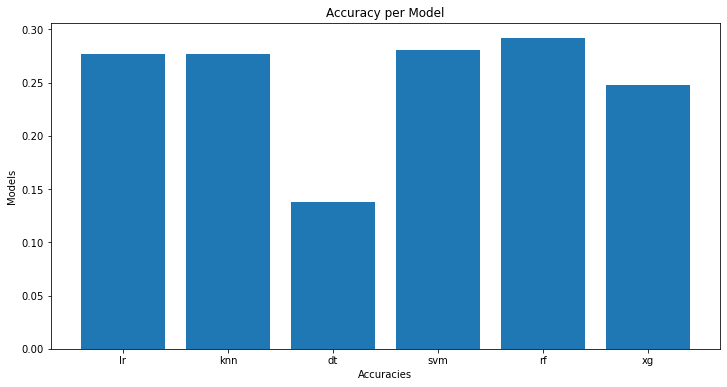

In [69]:
# now we can plot all our accuracies on a bar chart
model_names = list(scores.keys())
values = list(scores.values())

plt.figure(figsize=(12, 6))

plt.bar(range(len(scores)), values, tick_label=model_names)

# display the labels, title, and legends
plt.xlabel('Accuracies')
plt.ylabel('Models')
plt.title('Accuracy per Model')

plt.show();

Observations:
- Decision Tree is by far the worst performing model
- Random Forest performs best
- Logistic Regression, SVM, and KNN all had very similiar accuracies
- Classification is not giving us very good results, so deep learning may be a better way to go given the dataset

Results Ensemble Learning and Stacking: For this visualization we use a box and whisker plot so we can see variability and outliers. We also plot our stacking method so we can see how it performs along side our other models.

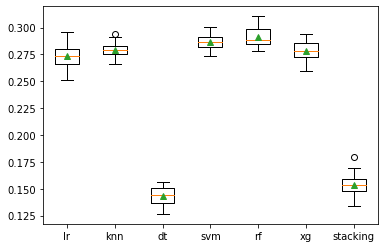

In [73]:
# view box plot for ensemble learning and stacking models
# evaluation
plt.boxplot(results, labels=names, showmeans=True)
plt.show();

Observations:
- Logistic Regression, Random Forest, and Stacking have the most variance
- Random Forest and SVM seem to produce the best results
- Stacking and KNN both have some outliers
- KNN has small variance

ROC Curve and AUC for Each Classifier: Now we will plot each classifiers' ROC log its AUC in the legend at the lower right. Each model will have a different color to differentiate one from another.

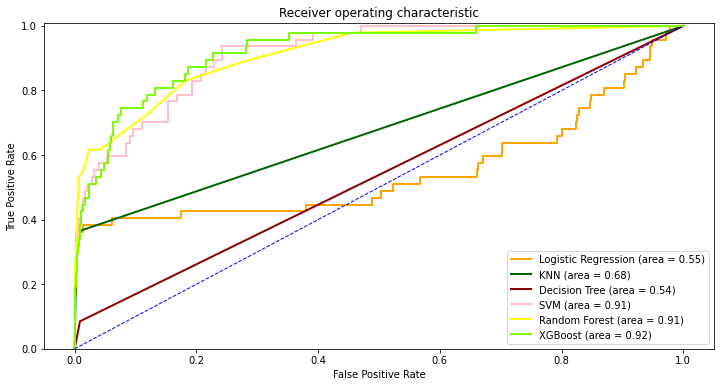

In [42]:
# keep figure inline
%matplotlib inline

# plot
plt.figure(figsize=(12, 6))

# logistic regression tree roc curve
plt.plot(fpr_lr, tpr_lr, color='orange', lw=2, 
         label='Logistic Regression (area = %0.2f)' % auc_lr)

# knn roc curve
plt.plot(fpr_knn, tpr_knn, color='darkgreen', lw=2, 
         label='KNN (area = %0.2f)' % auc_knn)

# decision tree roc curve
plt.plot(fpr_dt, tpr_dt, color='darkred', lw=2, 
         label='Decision Tree (area = %0.2f)' % auc_dt)

# decision tree roc curve
plt.plot(fpr_svm, tpr_svm, color='pink', lw=2, 
         label='SVM (area = %0.2f)' % auc_svm)

# random forest roc curve
plt.plot(fpr_rf, tpr_rf, color='yellow', lw=2, 
         label='Random Forest (area = %0.2f)' % auc_rf)

# random forest roc curve
plt.plot(fpr_xg, tpr_xg, color='lawngreen', lw=2, 
         label='XGBoost (area = %0.2f)' % auc_xg)

# random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# define the ranges
plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.01])

# display the labels, title, and legends
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# print
plt.show();

Observations:
- XGBoost performs best with respect to the AUC, while Random Forest and SVM are close 2nds
- If you want a False Postive rate between 5 and 20%, XGBoost would be the best option

#### Final Evaluation - Classification Models:
The best performing model was Random Forest, but with our dimensional reduction, or minimizing of estimators, and only running 3-fold Cross Validation, our accuracy is less than 30%. But even running the model with more than 200 estimators, no PCM, and 10-fold cross validation, our accuracy was still below 50%. For these reasons, Deep-Learning may be a better solution for the dataset

-------------------------------------------------------------------------------------------------------------------
## 6.) Deep Learning Models
-------------------------------------------------------------------------------------------------------------------

In this section we used 2 deep learning models the first being Artificial Neural Network (ANN) and the other a Convolutional Neural Network (CNN) to train our data and perform predictions.

#### A. Feature and Label Processing for ANN

First we will do the following:
- Load data
- Create our feature and label matrix
- Split into training and testing sets test_size = 0.25 and random_state = 5

In [152]:
# load pre-generated data directly from npz file
train_data = np.load('./data/train_xy.npz')
X = train_data['X']
y = train_data['y']

# split the dataset into testing and training, with the test size set to 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

- Process Features

In [153]:
# reshape each image so each pixel is a feature, so 16384 features
X_train = X_train.reshape(X_train.shape[0], 16384)
X_test = X_test.reshape(X_test.shape[0], 16384)

# scale the features to the range of [0,1]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

- Process Labels

In [154]:
# onehotencoding for the output label
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# print label after onehotencoding
print (y_train.shape)
print (y_train[:1,:])

(3201, 80)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]


In [7]:
# seed random state for reproducibility 
seed = 2
np.random.seed(seed)

#### B. Define ANN

First we will define our ANN architecture, for this we create 5 layers with an input layer, output layer, and 3 hidden layers each with sigmoid activation functions. Our neurons decrease in size from layer to layer, from 256 down to 64.

In [2]:
def model_creator():
    # sequential model to build network
    model = Sequential()
    input_size = 16384
    out_size = 80

    ## ANN Structure with 16384 inputs, 80 outputs and 128 to 32 neurons in each hidden layer

    # -----------------------------------------
    # first layer: input layer
    # input layer does not do any processing, so no need to define the input layer in this problem

    # -----------------------------------------
    # second layer: hidden layer
    model.add(Dense(256, input_dim = input_size))
    model.add(Activation('sigmoid')) # Activation
    model.add(Dropout(0.5))

    # -----------------------------------------
    # third layer: hidden layer
    model.add(Dense(128))
    model.add(Activation('sigmoid')) # Activation
    model.add(Dropout(0.5))

    # -----------------------------------------
    # fourth layer: hidden layer
    model.add(Dense(64))
    model.add(Activation('sigmoid')) # Activation
    model.add(Dropout(0.5))

    # -----------------------------------------
    # fifth layer: output layer
    model.add(Dense(out_size, input_dim = 64))
    model.add(Activation('softmax'))

    # compile model
    model.compile(loss='categorical_crossentropy',
                  metrics=['accuracy'],
                  optimizer='adam')
    # return: 
    return model 

Now we do the folling:
*   Wrap the model with a Keras Classifier
*   Run a Grid Search using batch_size = [16, 32,64], and epochs = [50, 100, 150]
*   Print Best Score and Parameters from the Grid Search

In [4]:
# wrap model using KerasClassifier
model = KerasClassifier(build_fn = model_creator, verbose=2)

In [158]:
# set batch size and epochs for a grid search
# to find best parameters
batch_size = [16, 32, 64]
epochs = [50, 100, 150]

# set the parameters, instantiate the grid search, and run on the training set
param_grid = dict(epochs=epochs, batch_size=batch_size)
grid = GridSearchCV(model, param_grid, cv=2, scoring='neg_log_loss')
grid_result = grid.fit(X_train, y_train)

Epoch 1/50
100/100 - 1s - loss: 4.4223 - accuracy: 0.0162
Epoch 2/50
100/100 - 1s - loss: 4.3289 - accuracy: 0.0144
Epoch 3/50
100/100 - 1s - loss: 4.2950 - accuracy: 0.0169
Epoch 4/50
100/100 - 1s - loss: 4.2784 - accuracy: 0.0213
Epoch 5/50
100/100 - 1s - loss: 4.2632 - accuracy: 0.0219
Epoch 6/50
100/100 - 1s - loss: 4.2621 - accuracy: 0.0194
Epoch 7/50
100/100 - 1s - loss: 4.2682 - accuracy: 0.0175
Epoch 8/50
100/100 - 1s - loss: 4.2522 - accuracy: 0.0206
Epoch 9/50
100/100 - 1s - loss: 4.2559 - accuracy: 0.0188
Epoch 10/50
100/100 - 1s - loss: 4.2422 - accuracy: 0.0206
Epoch 11/50
100/100 - 1s - loss: 4.2394 - accuracy: 0.0169
Epoch 12/50
100/100 - 1s - loss: 4.2426 - accuracy: 0.0162
Epoch 13/50
100/100 - 1s - loss: 4.2338 - accuracy: 0.0194
Epoch 14/50
100/100 - 1s - loss: 4.2206 - accuracy: 0.0200
Epoch 15/50
100/100 - 1s - loss: 4.2297 - accuracy: 0.0237
Epoch 16/50
100/100 - 1s - loss: 4.2119 - accuracy: 0.0300
Epoch 17/50
100/100 - 1s - loss: 4.1926 - accuracy: 0.0244
Epoch 

Epoch 40/100
100/100 - 1s - loss: 3.8676 - accuracy: 0.0550
Epoch 41/100
100/100 - 1s - loss: 3.8445 - accuracy: 0.0562
Epoch 42/100
100/100 - 1s - loss: 3.8336 - accuracy: 0.0519
Epoch 43/100
100/100 - 1s - loss: 3.8249 - accuracy: 0.0519
Epoch 44/100
100/100 - 1s - loss: 3.8000 - accuracy: 0.0662
Epoch 45/100
100/100 - 1s - loss: 3.7745 - accuracy: 0.0719
Epoch 46/100
100/100 - 1s - loss: 3.8175 - accuracy: 0.0594
Epoch 47/100
100/100 - 1s - loss: 3.7919 - accuracy: 0.0644
Epoch 48/100
100/100 - 1s - loss: 3.7839 - accuracy: 0.0625
Epoch 49/100
100/100 - 1s - loss: 3.7754 - accuracy: 0.0631
Epoch 50/100
100/100 - 1s - loss: 3.7511 - accuracy: 0.0650
Epoch 51/100
100/100 - 1s - loss: 3.7559 - accuracy: 0.0587
Epoch 52/100
100/100 - 1s - loss: 3.7379 - accuracy: 0.0719
Epoch 53/100
100/100 - 1s - loss: 3.7536 - accuracy: 0.0688
Epoch 54/100
100/100 - 1s - loss: 3.7334 - accuracy: 0.0644
Epoch 55/100
100/100 - 1s - loss: 3.7195 - accuracy: 0.0744
Epoch 56/100
100/100 - 1s - loss: 3.7224

Epoch 77/100
101/101 - 1s - loss: 3.5073 - accuracy: 0.1187
Epoch 78/100
101/101 - 1s - loss: 3.5183 - accuracy: 0.1156
Epoch 79/100
101/101 - 1s - loss: 3.5157 - accuracy: 0.1162
Epoch 80/100
101/101 - 1s - loss: 3.4952 - accuracy: 0.1149
Epoch 81/100
101/101 - 1s - loss: 3.4913 - accuracy: 0.1218
Epoch 82/100
101/101 - 1s - loss: 3.4930 - accuracy: 0.1224
Epoch 83/100
101/101 - 1s - loss: 3.5057 - accuracy: 0.1181
Epoch 84/100
101/101 - 1s - loss: 3.4707 - accuracy: 0.1230
Epoch 85/100
101/101 - 1s - loss: 3.4657 - accuracy: 0.1299
Epoch 86/100
101/101 - 1s - loss: 3.4873 - accuracy: 0.1237
Epoch 87/100
101/101 - 1s - loss: 3.4507 - accuracy: 0.1156
Epoch 88/100
101/101 - 1s - loss: 3.4650 - accuracy: 0.1181
Epoch 89/100
101/101 - 1s - loss: 3.4410 - accuracy: 0.1343
Epoch 90/100
101/101 - 1s - loss: 3.4676 - accuracy: 0.1218
Epoch 91/100
101/101 - 1s - loss: 3.4773 - accuracy: 0.1212
Epoch 92/100
101/101 - 1s - loss: 3.4467 - accuracy: 0.1449
Epoch 93/100
101/101 - 1s - loss: 3.4359

Epoch 114/150
100/100 - 1s - loss: 3.4438 - accuracy: 0.1144
Epoch 115/150
100/100 - 1s - loss: 3.4518 - accuracy: 0.1119
Epoch 116/150
100/100 - 1s - loss: 3.4300 - accuracy: 0.1069
Epoch 117/150
100/100 - 1s - loss: 3.4363 - accuracy: 0.1144
Epoch 118/150
100/100 - 1s - loss: 3.4425 - accuracy: 0.1206
Epoch 119/150
100/100 - 1s - loss: 3.4189 - accuracy: 0.1169
Epoch 120/150
100/100 - 1s - loss: 3.4213 - accuracy: 0.1144
Epoch 121/150
100/100 - 1s - loss: 3.4180 - accuracy: 0.1088
Epoch 122/150
100/100 - 1s - loss: 3.4238 - accuracy: 0.1244
Epoch 123/150
100/100 - 1s - loss: 3.3927 - accuracy: 0.1144
Epoch 124/150
100/100 - 1s - loss: 3.4077 - accuracy: 0.1100
Epoch 125/150
100/100 - 1s - loss: 3.3919 - accuracy: 0.1200
Epoch 126/150
100/100 - 1s - loss: 3.4122 - accuracy: 0.1094
Epoch 127/150
100/100 - 1s - loss: 3.3853 - accuracy: 0.1138
Epoch 128/150
100/100 - 1s - loss: 3.4003 - accuracy: 0.1125
Epoch 129/150
100/100 - 1s - loss: 3.3701 - accuracy: 0.1225
Epoch 130/150
100/100 - 

Epoch 100/150
101/101 - 1s - loss: 3.4084 - accuracy: 0.1380
Epoch 101/150
101/101 - 1s - loss: 3.3824 - accuracy: 0.1318
Epoch 102/150
101/101 - 1s - loss: 3.3860 - accuracy: 0.1330
Epoch 103/150
101/101 - 1s - loss: 3.3945 - accuracy: 0.1355
Epoch 104/150
101/101 - 1s - loss: 3.3882 - accuracy: 0.1255
Epoch 105/150
101/101 - 1s - loss: 3.3840 - accuracy: 0.1387
Epoch 106/150
101/101 - 1s - loss: 3.3824 - accuracy: 0.1337
Epoch 107/150
101/101 - 1s - loss: 3.3678 - accuracy: 0.1468
Epoch 108/150
101/101 - 1s - loss: 3.3963 - accuracy: 0.1343
Epoch 109/150
101/101 - 1s - loss: 3.3585 - accuracy: 0.1430
Epoch 110/150
101/101 - 1s - loss: 3.3739 - accuracy: 0.1387
Epoch 111/150
101/101 - 1s - loss: 3.3610 - accuracy: 0.1412
Epoch 112/150
101/101 - 1s - loss: 3.3661 - accuracy: 0.1312
Epoch 113/150
101/101 - 1s - loss: 3.3584 - accuracy: 0.1318
Epoch 114/150
101/101 - 1s - loss: 3.3377 - accuracy: 0.1493
Epoch 115/150
101/101 - 1s - loss: 3.3333 - accuracy: 0.1487
Epoch 116/150
101/101 - 

51/51 - 1s - loss: 4.0434 - accuracy: 0.0418
Epoch 41/50
51/51 - 1s - loss: 4.0058 - accuracy: 0.0394
Epoch 42/50
51/51 - 1s - loss: 4.0102 - accuracy: 0.0425
Epoch 43/50
51/51 - 1s - loss: 3.9941 - accuracy: 0.0475
Epoch 44/50
51/51 - 1s - loss: 3.9759 - accuracy: 0.0550
Epoch 45/50
51/51 - 1s - loss: 3.9592 - accuracy: 0.0525
Epoch 46/50
51/51 - 1s - loss: 3.9407 - accuracy: 0.0500
Epoch 47/50
51/51 - 1s - loss: 3.9361 - accuracy: 0.0506
Epoch 48/50
51/51 - 1s - loss: 3.9300 - accuracy: 0.0581
Epoch 49/50
51/51 - 1s - loss: 3.9286 - accuracy: 0.0537
Epoch 50/50
51/51 - 1s - loss: 3.8955 - accuracy: 0.0556
50/50 - 0s
Epoch 1/100
50/50 - 1s - loss: 4.4661 - accuracy: 0.0181
Epoch 2/100
50/50 - 1s - loss: 4.3274 - accuracy: 0.0100
Epoch 3/100
50/50 - 1s - loss: 4.3163 - accuracy: 0.0081
Epoch 4/100
50/50 - 1s - loss: 4.2902 - accuracy: 0.0219
Epoch 5/100
50/50 - 1s - loss: 4.2786 - accuracy: 0.0119
Epoch 6/100
50/50 - 1s - loss: 4.2690 - accuracy: 0.0206
Epoch 7/100
50/50 - 1s - loss: 4

Epoch 32/100
51/51 - 1s - loss: 4.0552 - accuracy: 0.0387
Epoch 33/100
51/51 - 1s - loss: 4.0598 - accuracy: 0.0456
Epoch 34/100
51/51 - 1s - loss: 4.0570 - accuracy: 0.0344
Epoch 35/100
51/51 - 1s - loss: 4.0252 - accuracy: 0.0475
Epoch 36/100
51/51 - 1s - loss: 4.0165 - accuracy: 0.0431
Epoch 37/100
51/51 - 1s - loss: 4.0018 - accuracy: 0.0412
Epoch 38/100
51/51 - 1s - loss: 3.9910 - accuracy: 0.0518
Epoch 39/100
51/51 - 1s - loss: 3.9911 - accuracy: 0.0562
Epoch 40/100
51/51 - 1s - loss: 3.9617 - accuracy: 0.0525
Epoch 41/100
51/51 - 1s - loss: 3.9572 - accuracy: 0.0525
Epoch 42/100
51/51 - 1s - loss: 3.9506 - accuracy: 0.0487
Epoch 43/100
51/51 - 1s - loss: 3.9409 - accuracy: 0.0587
Epoch 44/100
51/51 - 1s - loss: 3.9238 - accuracy: 0.0512
Epoch 45/100
51/51 - 1s - loss: 3.9219 - accuracy: 0.0612
Epoch 46/100
51/51 - 1s - loss: 3.8965 - accuracy: 0.0618
Epoch 47/100
51/51 - 1s - loss: 3.9022 - accuracy: 0.0575
Epoch 48/100
51/51 - 1s - loss: 3.8808 - accuracy: 0.0625
Epoch 49/100
5

50/50 - 1s - loss: 3.7613 - accuracy: 0.0587
Epoch 74/150
50/50 - 1s - loss: 3.7585 - accuracy: 0.0587
Epoch 75/150
50/50 - 1s - loss: 3.7594 - accuracy: 0.0662
Epoch 76/150
50/50 - 1s - loss: 3.7272 - accuracy: 0.0587
Epoch 77/150
50/50 - 1s - loss: 3.7385 - accuracy: 0.0700
Epoch 78/150
50/50 - 1s - loss: 3.7330 - accuracy: 0.0794
Epoch 79/150
50/50 - 1s - loss: 3.7210 - accuracy: 0.0606
Epoch 80/150
50/50 - 1s - loss: 3.7191 - accuracy: 0.0819
Epoch 81/150
50/50 - 1s - loss: 3.7304 - accuracy: 0.0737
Epoch 82/150
50/50 - 1s - loss: 3.7280 - accuracy: 0.0681
Epoch 83/150
50/50 - 1s - loss: 3.7123 - accuracy: 0.0787
Epoch 84/150
50/50 - 1s - loss: 3.7042 - accuracy: 0.0825
Epoch 85/150
50/50 - 1s - loss: 3.7031 - accuracy: 0.0737
Epoch 86/150
50/50 - 1s - loss: 3.6844 - accuracy: 0.0731
Epoch 87/150
50/50 - 1s - loss: 3.6901 - accuracy: 0.0706
Epoch 88/150
50/50 - 1s - loss: 3.6875 - accuracy: 0.0800
Epoch 89/150
50/50 - 1s - loss: 3.6557 - accuracy: 0.0800
Epoch 90/150
50/50 - 1s - l

Epoch 64/150
51/51 - 1s - loss: 3.7777 - accuracy: 0.0706
Epoch 65/150
51/51 - 1s - loss: 3.7665 - accuracy: 0.0750
Epoch 66/150
51/51 - 1s - loss: 3.7539 - accuracy: 0.0712
Epoch 67/150
51/51 - 1s - loss: 3.7441 - accuracy: 0.0706
Epoch 68/150
51/51 - 1s - loss: 3.7395 - accuracy: 0.0881
Epoch 69/150
51/51 - 1s - loss: 3.7377 - accuracy: 0.0812
Epoch 70/150
51/51 - 1s - loss: 3.7266 - accuracy: 0.0787
Epoch 71/150
51/51 - 1s - loss: 3.7244 - accuracy: 0.0831
Epoch 72/150
51/51 - 1s - loss: 3.7258 - accuracy: 0.0824
Epoch 73/150
51/51 - 1s - loss: 3.7097 - accuracy: 0.0893
Epoch 74/150
51/51 - 1s - loss: 3.7151 - accuracy: 0.0806
Epoch 75/150
51/51 - 1s - loss: 3.6909 - accuracy: 0.0824
Epoch 76/150
51/51 - 1s - loss: 3.6944 - accuracy: 0.0824
Epoch 77/150
51/51 - 1s - loss: 3.6851 - accuracy: 0.0906
Epoch 78/150
51/51 - 1s - loss: 3.6718 - accuracy: 0.0931
Epoch 79/150
51/51 - 1s - loss: 3.6668 - accuracy: 0.0899
Epoch 80/150
51/51 - 1s - loss: 3.6623 - accuracy: 0.0924
Epoch 81/150
5

26/26 - 0s - loss: 4.2945 - accuracy: 0.0125
Epoch 6/50
26/26 - 0s - loss: 4.2787 - accuracy: 0.0194
Epoch 7/50
26/26 - 0s - loss: 4.2870 - accuracy: 0.0169
Epoch 8/50
26/26 - 0s - loss: 4.2841 - accuracy: 0.0181
Epoch 9/50
26/26 - 0s - loss: 4.2726 - accuracy: 0.0169
Epoch 10/50
26/26 - 0s - loss: 4.2774 - accuracy: 0.0169
Epoch 11/50
26/26 - 0s - loss: 4.2761 - accuracy: 0.0162
Epoch 12/50
26/26 - 0s - loss: 4.2615 - accuracy: 0.0225
Epoch 13/50
26/26 - 0s - loss: 4.2614 - accuracy: 0.0225
Epoch 14/50
26/26 - 0s - loss: 4.2682 - accuracy: 0.0156
Epoch 15/50
26/26 - 0s - loss: 4.2663 - accuracy: 0.0169
Epoch 16/50
26/26 - 0s - loss: 4.2643 - accuracy: 0.0200
Epoch 17/50
26/26 - 0s - loss: 4.2601 - accuracy: 0.0162
Epoch 18/50
26/26 - 0s - loss: 4.2584 - accuracy: 0.0206
Epoch 19/50
26/26 - 0s - loss: 4.2442 - accuracy: 0.0194
Epoch 20/50
26/26 - 0s - loss: 4.2570 - accuracy: 0.0200
Epoch 21/50
26/26 - 0s - loss: 4.2509 - accuracy: 0.0162
Epoch 22/50
26/26 - 0s - loss: 4.2498 - accurac

Epoch 98/100
25/25 - 0s - loss: 3.7957 - accuracy: 0.0637
Epoch 99/100
25/25 - 0s - loss: 3.8091 - accuracy: 0.0600
Epoch 100/100
25/25 - 0s - loss: 3.8002 - accuracy: 0.0594
26/26 - 0s
Epoch 1/100
26/26 - 1s - loss: 4.4718 - accuracy: 0.0156
Epoch 2/100
26/26 - 0s - loss: 4.3643 - accuracy: 0.0187
Epoch 3/100
26/26 - 0s - loss: 4.3403 - accuracy: 0.0212
Epoch 4/100
26/26 - 0s - loss: 4.3179 - accuracy: 0.0150
Epoch 5/100
26/26 - 0s - loss: 4.3129 - accuracy: 0.0219
Epoch 6/100
26/26 - 0s - loss: 4.3004 - accuracy: 0.0169
Epoch 7/100
26/26 - 0s - loss: 4.2839 - accuracy: 0.0219
Epoch 8/100
26/26 - 0s - loss: 4.2814 - accuracy: 0.0144
Epoch 9/100
26/26 - 0s - loss: 4.2878 - accuracy: 0.0162
Epoch 10/100
26/26 - 0s - loss: 4.2678 - accuracy: 0.0225
Epoch 11/100
26/26 - 0s - loss: 4.2719 - accuracy: 0.0144
Epoch 12/100
26/26 - 0s - loss: 4.2713 - accuracy: 0.0181
Epoch 13/100
26/26 - 0s - loss: 4.2738 - accuracy: 0.0150
Epoch 14/100
26/26 - 0s - loss: 4.2622 - accuracy: 0.0231
Epoch 15/10

25/25 - 0s - loss: 4.2296 - accuracy: 0.0231
Epoch 40/150
25/25 - 0s - loss: 4.2427 - accuracy: 0.0175
Epoch 41/150
25/25 - 0s - loss: 4.2249 - accuracy: 0.0213
Epoch 42/150
25/25 - 0s - loss: 4.2257 - accuracy: 0.0219
Epoch 43/150
25/25 - 0s - loss: 4.2221 - accuracy: 0.0237
Epoch 44/150
25/25 - 0s - loss: 4.2273 - accuracy: 0.0262
Epoch 45/150
25/25 - 0s - loss: 4.2220 - accuracy: 0.0237
Epoch 46/150
25/25 - 0s - loss: 4.2240 - accuracy: 0.0213
Epoch 47/150
25/25 - 0s - loss: 4.2249 - accuracy: 0.0244
Epoch 48/150
25/25 - 0s - loss: 4.2098 - accuracy: 0.0256
Epoch 49/150
25/25 - 0s - loss: 4.2115 - accuracy: 0.0262
Epoch 50/150
25/25 - 0s - loss: 4.1869 - accuracy: 0.0306
Epoch 51/150
25/25 - 0s - loss: 4.1821 - accuracy: 0.0300
Epoch 52/150
25/25 - 0s - loss: 4.1757 - accuracy: 0.0219
Epoch 53/150
25/25 - 0s - loss: 4.1544 - accuracy: 0.0237
Epoch 54/150
25/25 - 0s - loss: 4.1431 - accuracy: 0.0206
Epoch 55/150
25/25 - 0s - loss: 4.1155 - accuracy: 0.0362
Epoch 56/150
25/25 - 0s - l

Epoch 30/150
26/26 - 0s - loss: 4.2433 - accuracy: 0.0206
Epoch 31/150
26/26 - 0s - loss: 4.2416 - accuracy: 0.0237
Epoch 32/150
26/26 - 0s - loss: 4.2483 - accuracy: 0.0187
Epoch 33/150
26/26 - 0s - loss: 4.2447 - accuracy: 0.0219
Epoch 34/150
26/26 - 0s - loss: 4.2387 - accuracy: 0.0250
Epoch 35/150
26/26 - 0s - loss: 4.2396 - accuracy: 0.0225
Epoch 36/150
26/26 - 0s - loss: 4.2425 - accuracy: 0.0212
Epoch 37/150
26/26 - 0s - loss: 4.2344 - accuracy: 0.0200
Epoch 38/150
26/26 - 0s - loss: 4.2371 - accuracy: 0.0287
Epoch 39/150
26/26 - 0s - loss: 4.2353 - accuracy: 0.0281
Epoch 40/150
26/26 - 0s - loss: 4.2331 - accuracy: 0.0231
Epoch 41/150
26/26 - 0s - loss: 4.2251 - accuracy: 0.0300
Epoch 42/150
26/26 - 0s - loss: 4.2300 - accuracy: 0.0281
Epoch 43/150
26/26 - 0s - loss: 4.2246 - accuracy: 0.0319
Epoch 44/150
26/26 - 0s - loss: 4.2211 - accuracy: 0.0350
Epoch 45/150
26/26 - 0s - loss: 4.2198 - accuracy: 0.0319
Epoch 46/150
26/26 - 0s - loss: 4.2108 - accuracy: 0.0344
Epoch 47/150
2

Epoch 20/150
101/101 - 1s - loss: 4.0368 - accuracy: 0.0381
Epoch 21/150
101/101 - 1s - loss: 4.0232 - accuracy: 0.0378
Epoch 22/150
101/101 - 1s - loss: 4.0064 - accuracy: 0.0465
Epoch 23/150
101/101 - 1s - loss: 3.9914 - accuracy: 0.0444
Epoch 24/150
101/101 - 1s - loss: 3.9672 - accuracy: 0.0462
Epoch 25/150
101/101 - 1s - loss: 3.9474 - accuracy: 0.0484
Epoch 26/150
101/101 - 1s - loss: 3.9238 - accuracy: 0.0509
Epoch 27/150
101/101 - 1s - loss: 3.9014 - accuracy: 0.0500
Epoch 28/150
101/101 - 1s - loss: 3.8851 - accuracy: 0.0559
Epoch 29/150
101/101 - 1s - loss: 3.8704 - accuracy: 0.0562
Epoch 30/150
101/101 - 1s - loss: 3.8579 - accuracy: 0.0647
Epoch 31/150
101/101 - 1s - loss: 3.8421 - accuracy: 0.0565
Epoch 32/150
101/101 - 1s - loss: 3.8240 - accuracy: 0.0606
Epoch 33/150
101/101 - 1s - loss: 3.8330 - accuracy: 0.0675
Epoch 34/150
101/101 - 1s - loss: 3.8140 - accuracy: 0.0665
Epoch 35/150
101/101 - 1s - loss: 3.8140 - accuracy: 0.0715
Epoch 36/150
101/101 - 1s - loss: 3.7895

In [159]:
# view the best result and parameters for the model
print(grid.best_score_)
print(grid.best_params_)

-3.6534933634271276
{'batch_size': 32, 'epochs': 150}


Here we can see our best parameters for our ANN is with a batch size of 32 and 150 epochs....Although more epochs could produce better results, our time and space complexity becomes too large

#### C. ANN Training

Visual representation of the structure of the ANN

In [3]:
# now we create the model
model = model_creator()

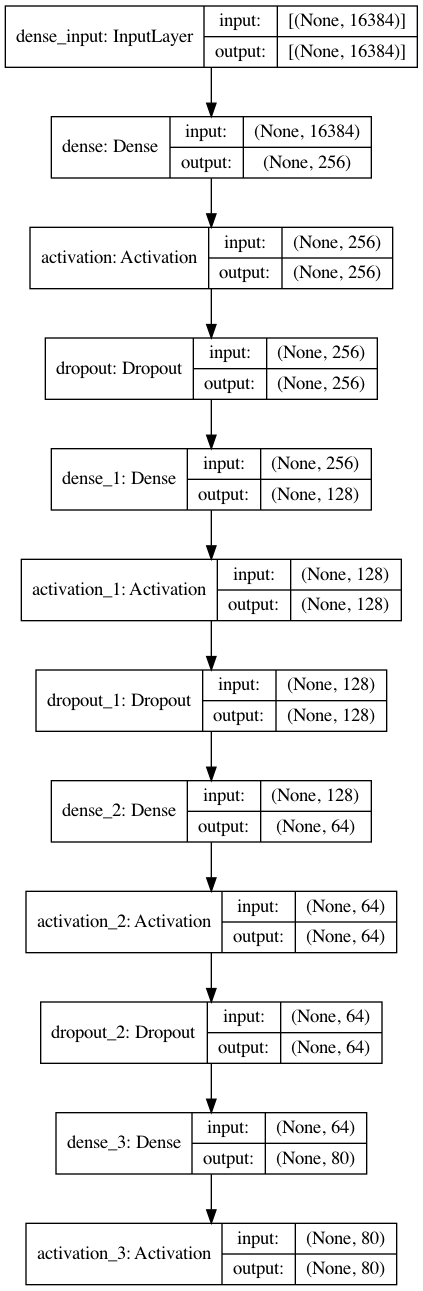

In [4]:
# create visualization
keras.utils.plot_model(model, show_shapes=True)

Now we will run our model with our best gridsearch parameters

In [166]:
# now we add our best performing parameters from gridsearch
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.5, patience=3)
fitted_model = model.fit(X_train, y_train, validation_split=0.25, batch_size=32, epochs=150, verbose=1)

Epoch 1/150
75/75 [==============================] - 1s 16ms/step - loss: 4.5109 - accuracy: 0.0137 - val_loss: 4.3017 - val_accuracy: 0.0175
Epoch 2/150
75/75 [==============================] - 1s 15ms/step - loss: 4.3264 - accuracy: 0.0164 - val_loss: 4.2823 - val_accuracy: 0.0175
Epoch 3/150
75/75 [==============================] - 1s 15ms/step - loss: 4.3024 - accuracy: 0.0146 - val_loss: 4.2765 - val_accuracy: 0.0175
Epoch 4/150
75/75 [==============================] - 1s 15ms/step - loss: 4.2819 - accuracy: 0.0178 - val_loss: 4.2724 - val_accuracy: 0.0175
Epoch 5/150
75/75 [==============================] - 1s 15ms/step - loss: 4.2629 - accuracy: 0.0229 - val_loss: 4.2675 - val_accuracy: 0.0175
Epoch 6/150
75/75 [==============================] - 1s 15ms/step - loss: 4.2773 - accuracy: 0.0138 - val_loss: 4.2663 - val_accuracy: 0.0175
Epoch 7/150
75/75 [==============================] - 1s 15ms/step - loss: 4.2589 - accuracy: 0.0168 - val_loss: 4.2681 - val_accuracy: 0.0175
Epoch 

75/75 [==============================] - 1s 14ms/step - loss: 3.4041 - accuracy: 0.1257 - val_loss: 3.6534 - val_accuracy: 0.0999
Epoch 116/150
75/75 [==============================] - 1s 15ms/step - loss: 3.4239 - accuracy: 0.1291 - val_loss: 3.6547 - val_accuracy: 0.0961
Epoch 117/150
75/75 [==============================] - 1s 14ms/step - loss: 3.4217 - accuracy: 0.1366 - val_loss: 3.6516 - val_accuracy: 0.1049
Epoch 118/150
75/75 [==============================] - 1s 14ms/step - loss: 3.3882 - accuracy: 0.1373 - val_loss: 3.6532 - val_accuracy: 0.1086
Epoch 119/150
75/75 [==============================] - 1s 14ms/step - loss: 3.4304 - accuracy: 0.1347 - val_loss: 3.6525 - val_accuracy: 0.0999
Epoch 120/150
75/75 [==============================] - 1s 14ms/step - loss: 3.4562 - accuracy: 0.1334 - val_loss: 3.6536 - val_accuracy: 0.0999
Epoch 121/150
75/75 [==============================] - 1s 14ms/step - loss: 3.4096 - accuracy: 0.1417 - val_loss: 3.6629 - val_accuracy: 0.1036
Epoch 

Now we visualize our accuracy and loss 

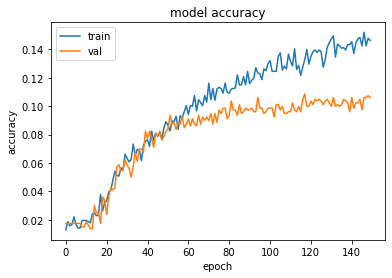

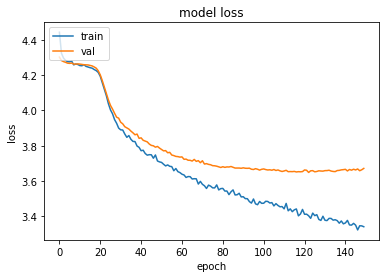

In [167]:
# view accuracy history
plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# view loss history
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show();

#### D. ANN Testing and Score

Now that we have trained our model we can run our prediction testing and get our final accuracy score

In [170]:
# generate prediction
y_predict = model.predict(X_test, verbose=1)
print (y_predict.shape)

34/34 [==============================] - 0s 3ms/step
(1068, 80)


In [171]:
# view accuracy score
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

34/34 [==============================] - 0s 4ms/step - loss: 3.5406 - accuracy: 0.1264
The accuracy is:  0.12640449404716492


Our ANN produces our worst accuracy number of any model, so we can assume that this will not be a valid model for the type of dataset that we have. We could certainly try different combinations of neurons and layers, but our more likely bet is to try running a CNN on the data

#### E. Feature and Label Processing for CNN

Before running our CNN we need to:
1. load the features and labels
2. scale the feature space
3. use onehotencoding for our labels

- Load Data

In [200]:
# load pre-generated data directly from npz file
train_data = np.load('./data/train_xy.npz')
X = train_data['X']
y = train_data['y']

# split the dataset into testing and training, with the test size set to 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

- Process Features

In [201]:
# reshape and then scale the features to the range of [0,1]
X_train = X_train.reshape(X_train.shape[0], 128, 128, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

- Process Labels

In [202]:
# onehotencoding for the output label
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# print label after onehotencoding
print (y_train.shape)
print (y_train[:1,:])

(3201, 80)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]


#### F. Define CNN

Now we can define our model, here we have 7 layers, the first 3 of which have pooling layers as well, and the last are the dropout and flatten - ouput layers. 

In [203]:
# sequential model
model = Sequential()

# CNN first layer (with 32 3x3 filter)
model.add(Convolution2D(32, (3, 3), padding="same", activation='relu', input_shape=(128,128,1)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# dropout layer to avoid overfitting
model.add(Dropout(0.25)) 

# more hidden layers
model.add(Convolution2D(32, (3, 3), padding="same", activation='relu'))
# model.add(Convolution2D(32, (3, 3), padding="same", activation='relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# dropout layer to avoid overfitting
model.add(Dropout(0.25)) 

# more hidden layers
model.add(Convolution2D(64, (3, 3), padding="same", activation='relu'))
# model.add(Convolution2D(64, (3, 3), padding="same", activation='relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# dropout layer to avoid overfitting
# model.add(Dropout(0.2)) 

# # more hidden layers
# model.add(Convolution2D(128, (3, 3), padding="same", activation='relu'))
# model.add(Convolution2D(128, (3, 3), padding="same", activation='relu'))
# pooling layer
# model.add(MaxPooling2D(pool_size=(2,2)))
# dropout layer to avoid overfitting
model.add(Dropout(0.5)) 

# output fully connected dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(80, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer='adam')
print(model.summary())

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_69 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_70 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 32, 32, 64)      

Let's view the structure of the model

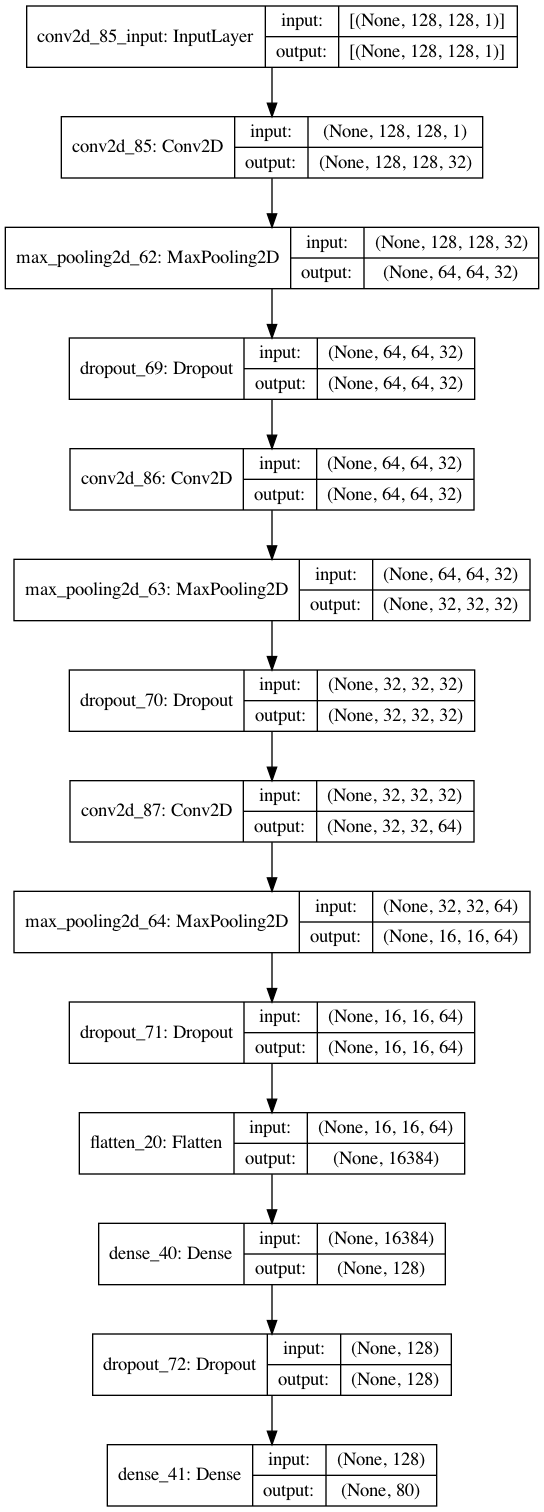

In [204]:
keras.utils.plot_model(model, show_shapes=True)

#### G. CNN Training

Now that we have our model we can perform training. For this example we will use our best parameters from the ANN gridsearch, because gridsearch is extremely time and resource expensing on our machines

In [205]:
# set our model with the parameters from our ANN gridsearch 
# given more time we would want to do gridsearch for CNN as well
# early_stopping = EarlyStopping(monitor='val_loss',  min_delta=0.05, patience=3)
fitted_model = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=40, verbose=1)

Epoch 1/40
80/80 [==============================] - 15s 186ms/step - loss: 4.3663 - accuracy: 0.0094 - val_loss: 4.3188 - val_accuracy: 0.0281
Epoch 2/40
80/80 [==============================] - 15s 183ms/step - loss: 4.3062 - accuracy: 0.0146 - val_loss: 4.2454 - val_accuracy: 0.0265
Epoch 3/40
80/80 [==============================] - 15s 182ms/step - loss: 4.1725 - accuracy: 0.0478 - val_loss: 4.0954 - val_accuracy: 0.0686
Epoch 4/40
80/80 [==============================] - 15s 184ms/step - loss: 4.0063 - accuracy: 0.0645 - val_loss: 3.8808 - val_accuracy: 0.1061
Epoch 5/40
80/80 [==============================] - 15s 184ms/step - loss: 3.8265 - accuracy: 0.1133 - val_loss: 3.7162 - val_accuracy: 0.1310
Epoch 6/40
80/80 [==============================] - 15s 186ms/step - loss: 3.7005 - accuracy: 0.1140 - val_loss: 3.6901 - val_accuracy: 0.1326
Epoch 7/40
80/80 [==============================] - 15s 185ms/step - loss: 3.5419 - accuracy: 0.1470 - val_loss: 3.6315 - val_accuracy: 0.1373

Now we visualize our accuracy and loss from the training

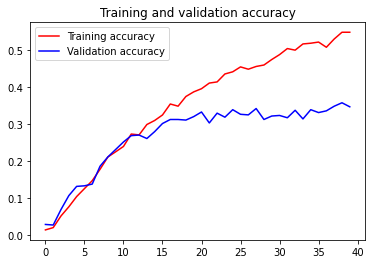

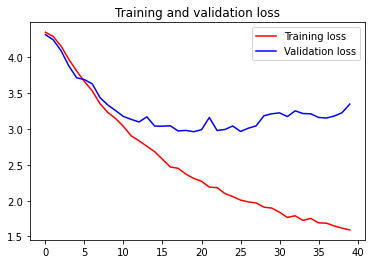

In [206]:
%matplotlib inline

# view our training and validation accuracy and loss
accuracy = fitted_model.history['accuracy']
val_accuracy = fitted_model.history['val_accuracy']
loss = fitted_model.history['loss']
val_loss = fitted_model.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show();

Now that our model is training we can run prediction and testing on the dataset and get a final accuracy score the for test

#### H. CNN Testing and Score

In [207]:
# prediction
predicted_classes = model.predict_classes(X_test, verbose=1)

34/34 [==============================] - 1s 40ms/step


In [208]:
# score
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

34/34 [==============================] - 1s 41ms/step - loss: 3.2437 - accuracy: 0.3530
The accuracy is:  0.35299625992774963


Already, with a fairly baseline model, our CNN looks like it produces the best results of any model, so we can assume, given more time/resources and more tinkering we could come up with our best accuracy numbers with this data from a CNN model

-------------------------------------------------------------------------------------------------------------------
## 7.) Conclusion and Future Work
-------------------------------------------------------------------------------------------------------------------

In conclusion, a CNN model seems to produce the best results given the dataset. For time and processing constraints we were limited in some of the types of CNN architectures we could run. Given time and resources, we would have liked to try ResNet and some CNN's with much deeper networks. Our classification models did not produce as great of results except for Random Forest. Although we could achieve more than 40% accuracy with more intensive parameters and a less feature restricted dataset, our CNN model still produced better results with baseline/generic parameters, for this reason and others, we still have the opinion that a 2d CNN is the way to go with this dataset.

-------------------------------------------------------------------------------------------------------------------
## 8.) Resources
-------------------------------------------------------------------------------------------------------------------

https://www.kaggle.com/c/freesound-audio-tagging-2019

https://medium.com/swlh/freesound-audio-tagging-recognizing-sounds-of-various-natures-bd8df75d5d59

https://www.kaggle.com/adnanzaidi/beginner-s-guide-to-audio-data-2

https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53

https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/

Also a lot of information came from our CS-4662 labs